In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from tqdm import tqdm 
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [3]:
df = pd.read_csv(path,header=0)

In [4]:
df.head()


,Unnamed: 0,Unnamed: 0.1,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate Regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000


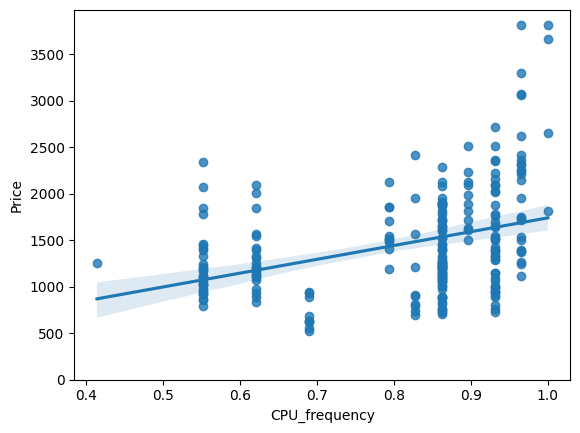

In [6]:
sns.regplot(x="CPU_frequency",y="Price" ,data =df)
plt.ylim(0.)
print(df[['CPU_frequency','Price']].corr())

                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000


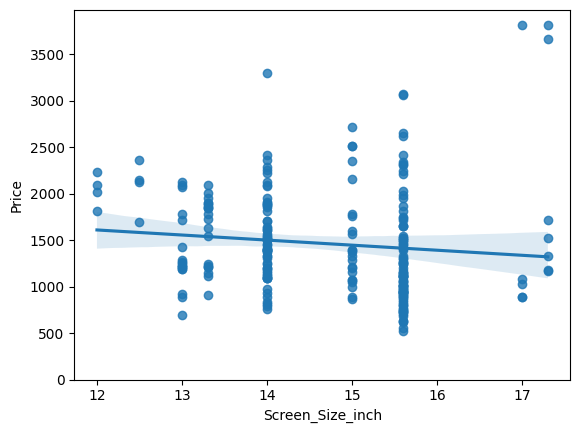

In [7]:
sns.regplot(x="Screen_Size_inch",y="Price" ,data =df)
plt.ylim(0.)
print(df[['Screen_Size_inch','Price']].corr())

               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


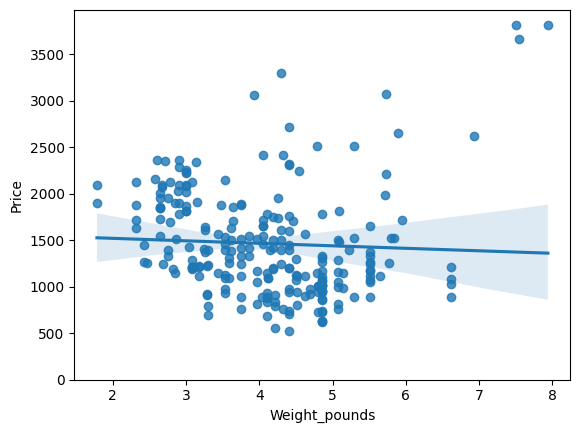

In [8]:
sns.regplot(x="Weight_pounds",y="Price" ,data =df)
plt.ylim(0.)
print(df[['Weight_pounds','Price']].corr())

### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<AxesSubplot: xlabel='GPU', ylabel='Price'>

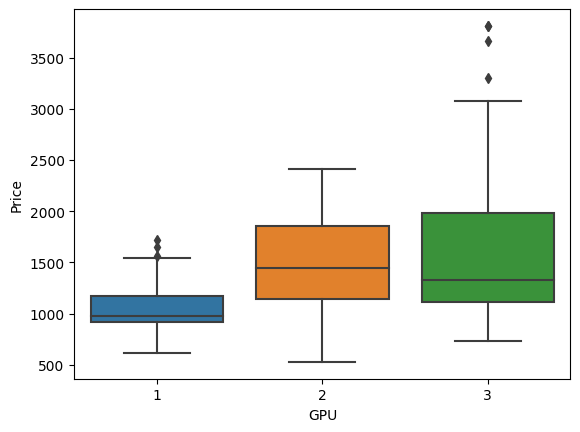

In [9]:
sns.boxplot(x="GPU",y="Price",data=df)

<AxesSubplot: xlabel='OS', ylabel='Price'>

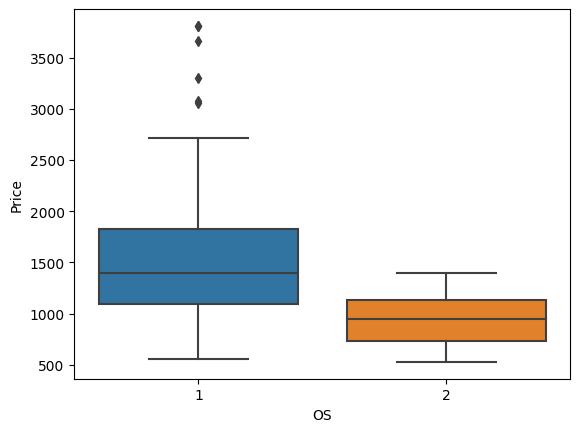

In [10]:
sns.boxplot(x="OS",y="Price",data=df)

In [11]:
sns.boxplot(x="CPU_core",y="Price",data=df)

<AxesSubplot: xlabel='CPU_core', ylabel='Price'>

<AxesSubplot: xlabel='RAM_GB', ylabel='Price'>

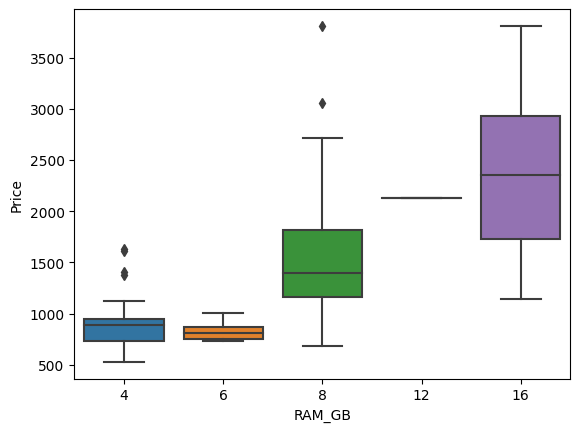

In [12]:
sns.boxplot(x="RAM_GB",y="Price",data=df)

<AxesSubplot: xlabel='Storage_GB_SSD', ylabel='Price'>

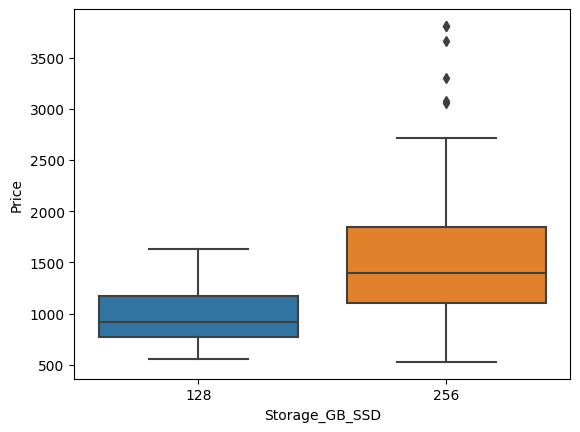

In [13]:
sns.boxplot(x="Storage_GB_SSD",y="Price",data=df)

In [14]:
gr_1 = df[["GPU","CPU_core","Price"]]
gr_test = gr_1.groupby(["GPU","CPU_core"],as_index=False).mean()
gr_test

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [15]:
pr_test = gr_test.pivot(index="GPU",columns="CPU_core")
pr_test

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

In [16]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson,p_value = stats.pearsonr(df[param],df["Price"])
    print(param)
    print("the pearson coef is ",pearson,"the p value is",p_value)

RAM_GB
the pearson coef is  0.5492972971857842 the p value is 3.6815606288437377e-20
CPU_frequency
the pearson coef is  0.36666555892588604 the p value is 5.5024633507147195e-09
Storage_GB_SSD
the pearson coef is  0.2434207552181029 the p value is 0.00014898923191727792
Screen_Size_inch
the pearson coef is  -0.11064420817118266 the p value is 0.08853397846832801
Weight_pounds
the pearson coef is  -0.05031225837751546 the p value is 0.4397693853434994
CPU_core
the pearson coef is  0.45939777733551157 the p value is 7.912950127011088e-14
OS
the pearson coef is  -0.22172980114827381 the p value is 0.0005696642559248033
GPU
the pearson coef is  0.2882981988881428 the p value is 6.166949698365852e-06
Category
the pearson coef is  0.28624275581264125 the p value is 7.225696235808316e-06


In [17]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)

In [18]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Cross validation

In [19]:
y_data = df['Price']
x_data = df.drop(["Price"],axis=1)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=1)

In [21]:
lr = LinearRegression()
lr.fit(x_train[["CPU_frequency"]],y_train)
print("score of the testing data :",lr.score(x_test[["CPU_frequency"]],y_test))
print("score of the training data :",lr.score(x_train[["CPU_frequency"]],y_train))

score of the testing data : -0.06599437350393789
score of the training data : 0.14829792099817973


In [22]:
Rcross = cross_val_score(lr,x_data[['CPU_frequency']],y_data,cv=4)
print("the mean of the fold is ",Rcross.mean(),"and the std is ",Rcross.std())

## Polinomial Regression 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.5,random_state=1)

In [24]:

order = [1,2,3,4,5]
resulat = []
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[["CPU_frequency"]])
    x_test_pr = pr.fit_transform(x_train[["CPU_frequency"]])
    Polly = LinearRegression()
    Polly.fit(x_train_pr,y_train)
    score_pr = Polly.score(x_test_pr,y_test)
    resulat.append(score_pr)
    
    
    


(Text(0, 0.5, 'R^2'), Text(0.5, 0, 'orders'))

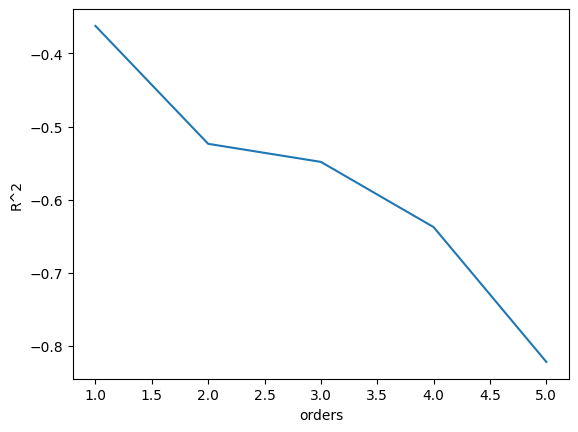

In [25]:
plt.plot(order,resulat)
plt.ylabel("R^2"),plt.xlabel("orders")

In [26]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr1 = pr1.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [29]:
resulat_test = []
result_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)
for alpha in pbar :
    RR = Ridge(alpha=alpha)
    RR.fit(x_train_pr1,y_train)
    score_train,score_test = RR.score(x_train_pr1,y_train),RR.score(x_test_pr1,y_test)
    resulat_test.append(score_test)
    result_train.append(score_train)
    

100%|██████████| 999/999 [00:01<00:00, 669.64it/s]


Text(0.5, 1.0, 'R score progress')

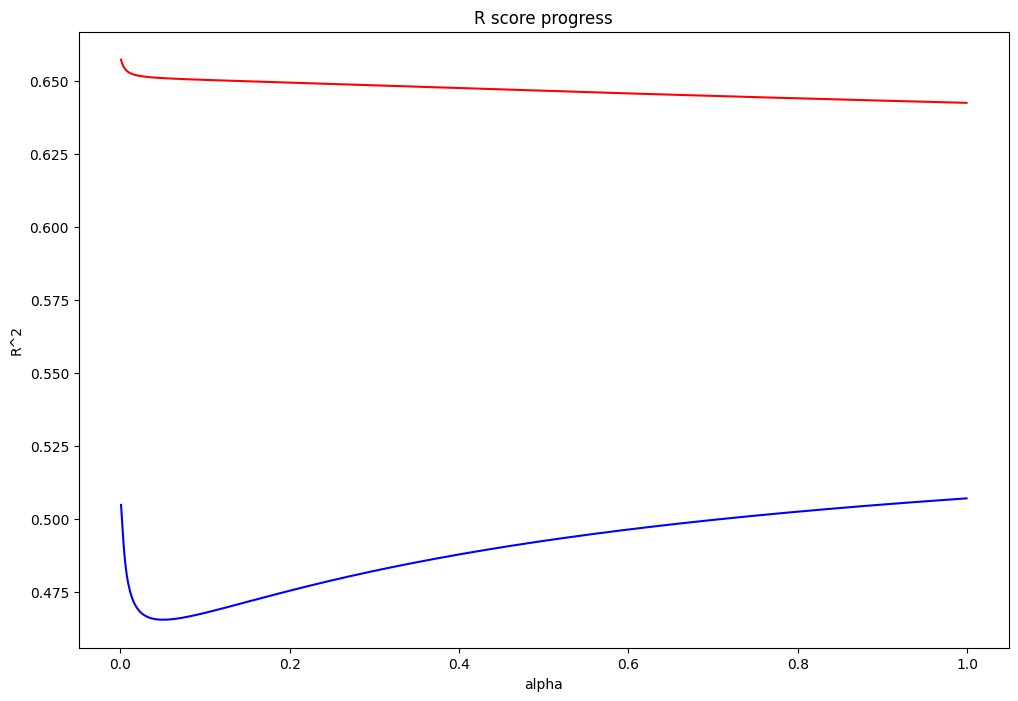

In [28]:
plt.figure(figsize=(12,8))
plt.plot(Alpha,result_train,"r")
plt.plot(Alpha,resulat_test,"b")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.title("R score progress")

In [31]:
#Gridsearch 
parametres=[{"alpha" : [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
Grid_RR = GridSearchCV(RR,parametres,cv=4)

In [32]:
Grid_RR.fit(x_train_pr,y_train)

GridSearchCV(cv=4, estimator=Ridge(alpha=0.999),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [43]:
best_RR = Grid_RR.best_estimator_
best_RR

Ridge(alpha=0.001)

In [45]:
RR_G = Ridge(alpha=0.001)
RR_G.fit(x_train_pr1,y_train)
RR_G.score(x_test_pr1,y_test)
Yhat_G=RR_G.predict(x_train_pr1)





/tmp/ipykernel_41/1455612546.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(Yhat_G,hist=False,color="b")
/tmp/ipykernel_41/1455612546.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,hist=False,color="r",ax=ax1)


<AxesSubplot: xlabel='Price', ylabel='Density'>

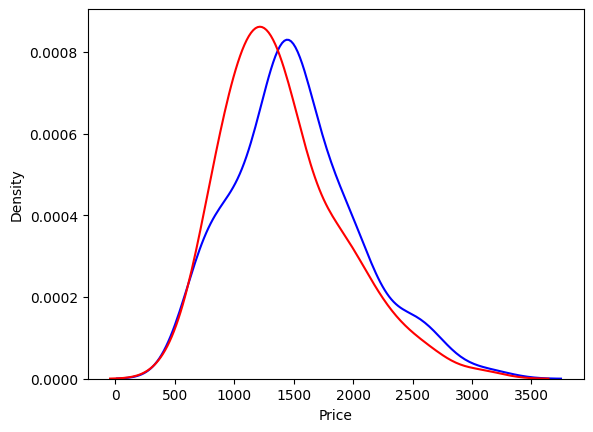

In [46]:
ax1=sns.distplot(Yhat_G,hist=False,color="b")
sns.distplot(y_test,hist=False,color="r",ax=ax1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6f0b082-6b18-4e9e-9833-a8f8f5db9440' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>